In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import tarfile
import pandas as pd
import numpy as np
import igraph as ig

In [2]:
G = nx.read_edgelist("soc-pokec-relationships.txt.gz", create_using = nx.DiGraph())

In [3]:
G_friends = G.to_undirected(reciprocal=True)

In [4]:
G_friends.number_of_edges()

8320600

In [3]:
columns = [
    "user_id", "public", "completion_percentage", "gender", "region", "last_login", 
    "registration", "AGE", "body", "I_am_working_in_field", "spoken_languages", 
    "hobbies", "I_most_enjoy_good_food", "pets", "body_type", "my_eyesight", 
    "eye_color", "hair_color", "hair_type", "completed_level_of_education", 
    "favourite_color", "relation_to_smoking", "relation_to_alcohol", 
    "sign_in_zodiac", "on_pokec_i_am_looking_for", "love_is_for_me", 
    "relation_to_casual_sex", "my_partner_should_be", "marital_status", 
    "children", "relation_to_children", "I_like_movies", 
    "I_like_watching_movie", "I_like_music", 
    "I_mostly_like_listening_to_music", "the_idea_of_good_evening", 
    "I_like_specialties_from_kitchen", "fun", "I_am_going_to_concerts", 
    "my_active_sports", "my_passive_sports", "profession", 
    "I_like_books", "life_style", "music", "cars", 
    "politics", "relationships", "art_culture", 
    "hobbies_interests", "science_technologies", 
    "computers_internet", "education", "sport", 
    "movies", "travelling", "health", 
    "companies_brands", "more"
]

In [4]:
df_all = pd.read_csv('soc-pokec-profiles.txt.gz', compression='gzip', sep='\t', names=columns, encoding='utf-8', on_bad_lines='skip', index_col=False)

In [7]:
pd.set_option('display.expand_frame_repr', False)

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df_all['region'].value_counts().to_frame())

                                                    count
region                                                   
zahranicie, zahranicie - ostatne                    61571
nitriansky kraj, nitra                              55215
zilinsky kraj, zilina                               50053
presovsky kraj, presov                              47928
banskobystricky kraj, banska bystrica               46984
kosicky kraj, kosice - okolie                       37124
trnavsky kraj, trnava                               36953
zahranicie, zahranicie - gb                         33376
presovsky kraj, poprad                              30513
trenciansky kraj, prievidza                         30332
kosicky kraj, michalovce                            29911
trenciansky kraj, trencin                           29567
bratislavsky kraj, bratislava - petrzalka           27011
nitriansky kraj, nove zamky                         26178
zilinsky kraj, martin                               26021
bratislavsky k

In [7]:
df = df_all.loc[(df_all['region'] == 'nitriansky kraj, nitra') | (df_all['region'] == 'zilinsky kraj, zilina') | (df_all['region'] == 'zahranicie, zahranicie - ostatne')]

In [9]:
df

,user_id,public,completion_percentage,gender,region,last_login,registration,AGE,body,I_am_working_in_field,...,hobbies_interests,science_technologies,computers_internet,education,sport,movies,travelling,health,companies_brands,more
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,1,66,1.0,"zilinsky kraj, zilina",2012-05-25 01:10:00.0,2006-05-29 00:00:00.0,26.0,NaN,som nezamestnany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,6,0,22,0.0,"zilinsky kraj, zilina",2012-05-25 20:40:00.0,2007-12-15 00:00:00.0,38.0,"160 cm, 57 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,34,1,66,1.0,"zilinsky kraj, zilina",2012-05-15 09:18:00.0,2007-01-24 00:00:00.0,23.0,"180 cm, 70 kg, dost haluzne skoro ako mimozems...",tak to ani nechcite vediet je to ako o zivot,...,"<div> <a title=""vstup do klubu"" href=""/klub/ru...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,61,1,12,0.0,"zilinsky kraj, zilina",2012-04-11 23:40:00.0,2009-10-27 00:00:00.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632726,1632727,1,53,0.0,"zahranicie, zahranicie - ostatne",2012-05-10 17:59:00.0,2012-05-08 00:00:00.0,0.0,"173 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632740,1632741,1,43,1.0,"nitriansky kraj, nitra",2011-08-16 19:38:00.0,2008-12-20 00:00:00.0,49.0,"191 cm, 92 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632755,1632756,0,26,0.0,"zilinsky kraj, zilina",2011-06-07 11:36:00.0,2010-01-11 00:00:00.0,0.0,"175 cm, 68 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632772,1632773,1,12,0.0,"nitriansky kraj, nitra",2011-10-25 02:17:00.0,2004-02-10 00:00:00.0,45.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(166839, 59)

In [50]:
G_sub = G.subgraph([str(n) for n in list(df['user_id'])])

### Network description

In [13]:
G.number_of_edges()

30622564

In [14]:
G.number_of_nodes()

1632803

In [15]:
G_sub.number_of_edges()

1171710

In [16]:
G_sub.number_of_nodes()

166839

Визуализация

In [5]:
import graphistry

In [6]:
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", personal_key_id="IY321IFH8K", personal_key_secret="JJ0XX3D5C9Q2GPU8")

In [ ]:
src = []
dst = []
for e in G_friends.edges:
    src.append(e[0])
    dst.append(e[1])
edges = pd.DataFrame({
    'source': src,
    'destination': dst
})

In [ ]:
# np.savetxt('edges_friends.csv', [p for p in zip(src, dst)], delimiter=',', fmt='%s')
#nodes = [n for n in G.nodes]
#with open("nodes.tsv", "w") as f:
#  print("%s" % ("id"), file=f)
#  for n in nodes:
#    print("%s" % (n), file=f)

In [ ]:
g = graphistry.edges(edges[:8_000_000], 'source', 'destination') # maximum number of edges = 8M
g.plot()

In [51]:
src = []
dst = []
for e in G_sub.edges:
    src.append(e[0])
    dst.append(e[1])
edges = pd.DataFrame({
    'source': src,
    'destination': dst
})
nodes = pd.DataFrame({
    'node_id': list(G_sub.nodes()),
    'age': [df_all[df_all['user_id'] == int(x)]['AGE'].values[0] for x in list(G_sub.nodes())]
})

In [52]:
g = graphistry.bind(source='source', destination='destination',
           node='node_id', point_color='age')
g.plot(edges, nodes)

In [23]:
g = graphistry.edges(edges, 'source', 'destination')
g.plot()

Degree Analysis

Text(0, 0.5, 'Frequency')

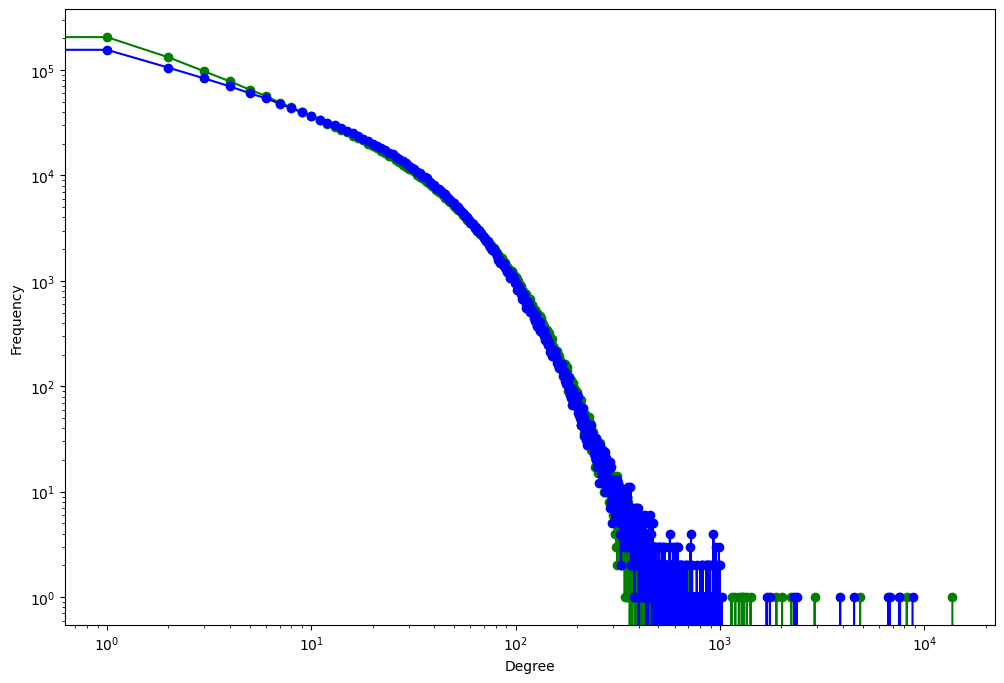

In [24]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

Max degree

Node with max in degree

In [57]:
max(dict(G.in_degree()).values())

13733

In [35]:
max(dict(G.in_degree()), key=dict(G.in_degree()).get)

'5935'

Ego-graph

In [16]:
ego_v = '5935'
G_ego_max_in = nx.ego_graph(G, ego_v, undirected=True) # undirected=True for both directions

In [40]:
src = []
dst = []
for e in G_ego_max_in.edges:
    src.append(e[0])
    dst.append(e[1])
edges = pd.DataFrame({
    'source': src,
    'destination': dst
})
nodes = pd.DataFrame({
    'node_id': list(G_ego_max_in.nodes()),
    'age': [df_all[df_all['user_id'] == int(x)]['AGE'].values[0] for x in list(G_ego_max_in.nodes())]
})

In [41]:
g = graphistry.bind(source='source', destination='destination',
           node='node_id', point_color='age')
g.plot(edges, nodes)

Node with max out degree

In [31]:
max(dict(G.out_degree()).values())

8763

In [58]:
max(dict(G.out_degree()), key=dict(G.out_degree()).get)

'5867'

Ego-graph

In [43]:
ego_v = '5867'
G_ego_max_out = nx.ego_graph(G, ego_v, undirected=True) # undirected=True for both directions

In [44]:
src = []
dst = []
for e in G_ego_max_out.edges:
    src.append(e[0])
    dst.append(e[1])
edges = pd.DataFrame({
    'source': src,
    'destination': dst
})
nodes = pd.DataFrame({
    'node_id': list(G_ego_max_out.nodes()),
    'age': [df_all[df_all['user_id'] == int(x)]['AGE'].values[0] for x in list(G_ego_max_out.nodes())]
})

In [45]:
g = graphistry.bind(source='source', destination='destination',
           node='node_id', point_color='age')
g.plot(edges, nodes)

Average degree

In [25]:
sum(dict(G.in_degree()).values()) / G.number_of_nodes()

18.754598074599325

In [26]:
sum(dict(G.out_degree()).values()) / G.number_of_nodes()

18.754598074599325

In [27]:
sum(dict(G.degree()).values()) / G.number_of_nodes()

37.50919614919865

Age distribution of vertices with the highest degrees

In [8]:
biggest_in_degree = sorted(dict(G.in_degree()).items(), key=lambda item: item[1], reverse=True)

Text(0, 0.5, 'Age')

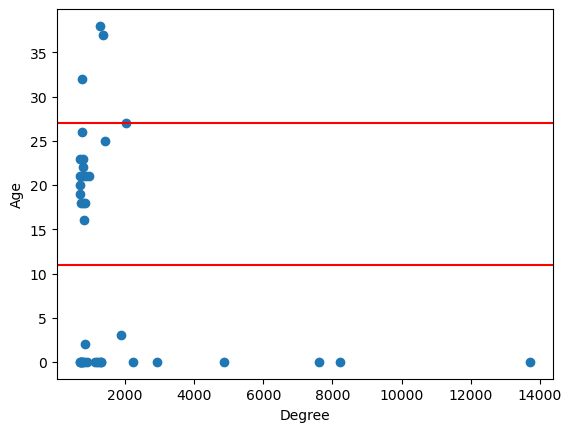

In [10]:
cnt = 40
deg = [i[1] for i in biggest_in_degree[:cnt]]
ages = [int(df_all[df_all['user_id'] == int(i[0])]['AGE'].values[0]) for i in biggest_in_degree[:cnt]]
plt.axhline(2011 - 2000, color='r') # граница зумеров и милениалов
plt.axhline(2011 - 1984, color='r') # граница милениалов и поколения X
plt.scatter(deg, ages)
plt.xlabel('Degree')
plt.ylabel('Age')

In [11]:
biggest_out_degree = sorted(dict(G.out_degree()).items(), key=lambda item: item[1], reverse=True)

Text(0, 0.5, 'Age')

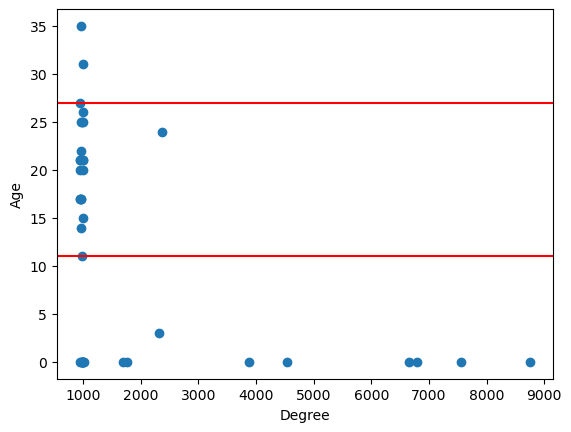

In [13]:
cnt = 40
deg = [i[1] for i in biggest_out_degree[:cnt]]
ages = [int(df_all[df_all['user_id'] == int(i[0])]['AGE'].values[0]) for i in biggest_out_degree[:cnt]]
plt.axhline(2011 - 2000, color='r') # граница зумеров и милениалов
plt.axhline(2011 - 1984, color='r') # граница милениалов и поколения X
plt.scatter(deg, ages)
plt.xlabel('Degree')
plt.ylabel('Age')

Friends degree

In [14]:
biggest_friend_degree = sorted(dict(G_friends.degree()).items(), key=lambda item: item[1], reverse=True)

Text(0, 0.5, 'Age')

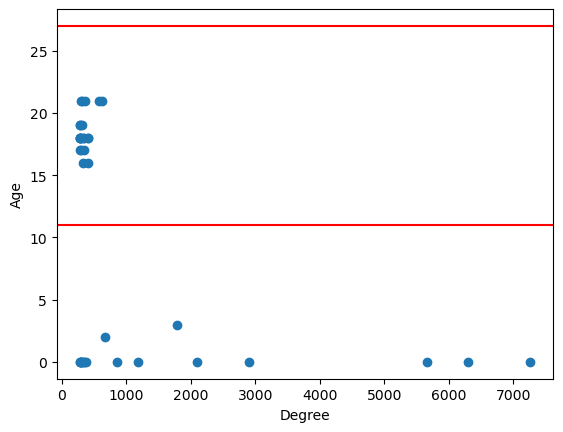

In [15]:
cnt = 40
deg = [i[1] for i in biggest_friend_degree[:cnt]]
ages = [int(df_all[df_all['user_id'] == int(i[0])]['AGE'].values[0]) for i in biggest_friend_degree[:cnt]]
plt.axhline(2011 - 2000, color='r') # граница зумеров и милениалов
plt.axhline(2011 - 1984, color='r') # граница милениалов и поколения X
plt.scatter(deg, ages)
plt.xlabel('Degree')
plt.ylabel('Age')

Сильно связные компоненты

In [113]:
# наибольшая компонента сильной связности для подсчета характеристик
largest = max(nx.strongly_connected_components(G_sub), key=len)
G_LSCC = G_sub.subgraph(largest)

In [114]:
print("number_of_nodes in largest CSS = ", G_LSCC.number_of_nodes(), "; number_of_edges in largest CSS = ", G_LSCC.number_of_edges())

number_of_nodes in largest CSS =  86327 ; number_of_edges in largest CSS =  1068600


Density

In [18]:
print("dencity of G = ", nx.density(G))
print("dencity of largest SCC in G_sub = ", nx.density(G_LSCC))

dencity of G =  1.148614349725155e-05
dencity of largest SCC in G_sub =  0.00014339265405487813


Distance

In [116]:
print("diameter - maximum between every pair of nodes in largest SCC in G_sub (approximation) = ", nx.approximation.diameter(G_LSCC))

diameter - maximum between every pair of nodes in largest SCC in G_sub (approximation) =  23


In [12]:
largest = max(nx.strongly_connected_components(G), key=len)
G_LSCC_all = G.subgraph(largest)

In [118]:
print("diameter - maximum between every pair of nodes in largest SCC (approximation) = ", nx.approximation.diameter(G_LSCC_all))

diameter - maximum between every pair of nodes in largest SCC (approximation) =  17


In [50]:
import igraph as ig

In [64]:
G_ig = ig.Graph.from_networkx(G)

In [51]:
G_sub_ig = ig.Graph.from_networkx(G_sub)

In [ ]:
G_ig.diameter(directed=True, unconn=True, weights=None)

In [ ]:
#print("average distance between every pair of nodes in largest SCC = ", nx.average_shortest_path_length(G_LSCC))
#print("eccentricity - largest distance between a node and all the other nodes", nx.eccentricity(G_LSCC_all))
#print("periphery - set of nodes that have eccentricity equal to the diameter", nx.periphery(G_LSCC_all))
#print("center - set of nodes that have eccetricity equal to the radius (minimum eccentricity)", nx.center(G_LSCC_all))

Clustering

In [ ]:
nx.approximation.average_clustering(G_friends) # only for not directed graphs
#clustering = print("clustering = ", nx.clustering(G))
#transitivity = nx.transitivity(G_LSCC)

0.077

Network Centrality

In [10]:
in_degree_centrality_G = nx.in_degree_centrality(G)

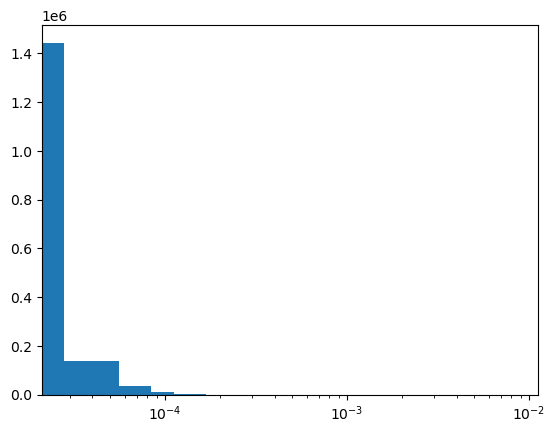

In [30]:
plt.hist(list(in_degree_centrality_G.values()), bins=300)
plt.xscale('log')
plt.show()

In [24]:
out_degree_centrality_G = nx.out_degree_centrality(G)

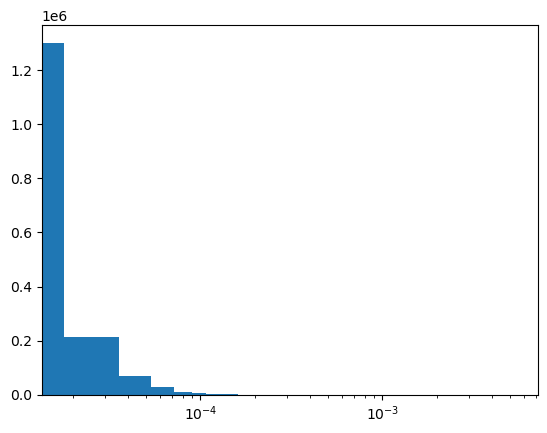

In [29]:
plt.hist(list(out_degree_centrality_G.values()), bins=300)
plt.xscale('log')
plt.show()

In [ ]:
betweenness_cen_sub = G_sub_ig.betweenness(directed=True, weights=None)

In [32]:
import csv

In [ ]:
with open('betweenness_cen_sub.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for item in betweenness_cen_sub:
        csv_writer.writerow([item])

In [43]:
betweenness_cen_sub = []
with open('betweenness_cen_sub.csv', newline='') as f:
    reader = csv.reader(f)
    for n in reader:
        betweenness_cen_sub.append(float(n[0]))

In [45]:
betweenness_cen_sub[0:10]

[515427.3290390275,
 122071.44725663798,
 3553.3809725439046,
 0.0,
 2170028.856652906,
 0.0,
 0.0,
 428694.78945246513,
 0.0,
 6511.16429138542]

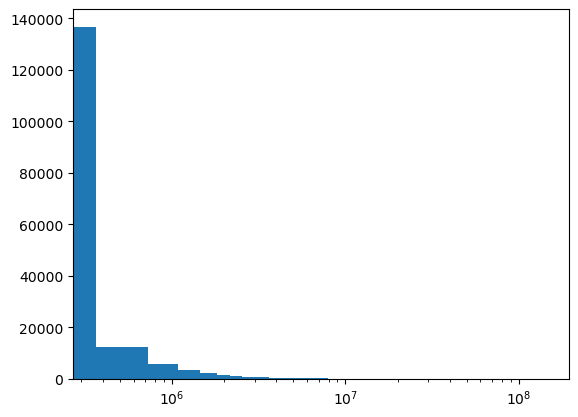

In [49]:
plt.hist(betweenness_cen_sub, bins=400)
plt.xscale('log')
plt.show()

In [53]:
closeness_cen_sub = G_sub_ig.closeness()

In [55]:
with open('closeness_cen_sub.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for item in closeness_cen_sub:
        csv_writer.writerow([item])

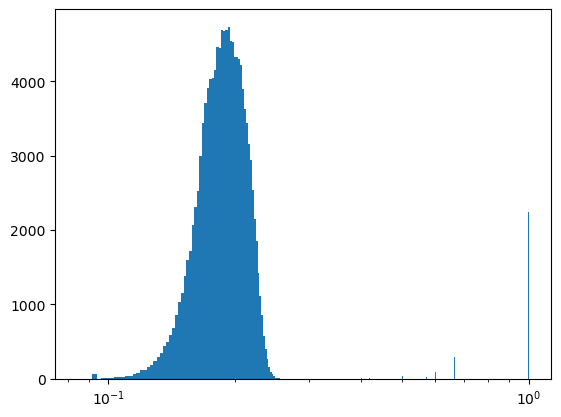

In [56]:
plt.hist(closeness_cen_sub, bins=400)
plt.xscale('log')
plt.show()

In [ ]:
closeness_cen = G_ig.closeness()

In [69]:
eigenvector_cen = G_ig.eigenvector_centrality()

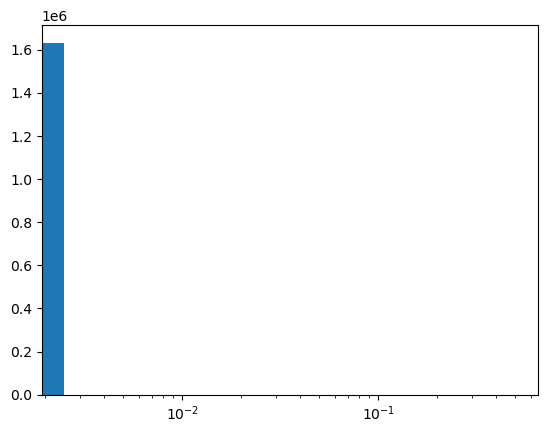

In [70]:
plt.hist(eigenvector_cen, bins=400)
plt.xscale('log')
plt.show()